In [1]:
# Importamos las librerias
import fastf1 as f1
import fastf1.plotting
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Cargamos una carpeta cache para guardar los datos descargados
f1.Cache.enable_cache('cache')

In [3]:
# Cargamos los datos del UNITED STATES GRAND PRIX 2024
sesion = f1.get_session(2024, 19, 'S')

In [4]:
# Sesion, nombre y fecha de la carrera
print(sesion.name)
print(sesion.event.OfficialEventName)
print(sesion.date)

Sprint
FORMULA 1 PIRELLI UNITED STATES GRAND PRIX 2024
2024-10-19 18:00:00


In [5]:
# Cargamos la informacion de la carrera
sesion.load()

core           INFO 	Loading data for United States Grand Prix - Sprint [v3.4.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INF

In [6]:
sesion.results[['Position', 'BroadcastName', 'Abbreviation', 'TeamName', 'CountryCode', 'Status', 'Points']]

,Position,BroadcastName,Abbreviation,TeamName,CountryCode,Status,Points
1,1.0,M VERSTAPPEN,VER,Red Bull Racing,NED,Finished,8.0
55,2.0,C SAINZ,SAI,Ferrari,ESP,Finished,7.0
4,3.0,L NORRIS,NOR,McLaren,GBR,Finished,6.0
16,4.0,C LECLERC,LEC,Ferrari,MON,Finished,5.0
63,5.0,G RUSSELL,RUS,Mercedes,GBR,Finished,4.0
44,6.0,L HAMILTON,HAM,Mercedes,GBR,Finished,3.0
20,7.0,K MAGNUSSEN,MAG,Haas F1 Team,DEN,Finished,2.0
27,8.0,N HULKENBERG,HUL,Haas F1 Team,GER,Finished,1.0
11,9.0,S PEREZ,PER,Red Bull Racing,MEX,Finished,0.0
81,10.0,O PIASTRI,PIA,McLaren,AUS,Finished,0.0


## Ritmo de carrera de los equipos

In [7]:
# Vueltas de cada piloto
vueltas = sesion.laps.pick_quicklaps()

In [8]:
transform_vueltas = vueltas.copy()
transform_vueltas.loc[:, "LapTime (s)"] = vueltas["LapTime"].dt.total_seconds()

# Ordenamos los equipos segun la media de tiempo, desde el mas rapido al mas lento
equipos = (
    transform_vueltas[["Team", "LapTime (s)"]]
    .groupby("Team")
    .median()["LapTime (s)"]
    .sort_values()
    .index
)

# Asociamos los equipos con colores
team_palette = {team: f1.plotting.get_team_color(team, session=sesion)
                for team in equipos}

req            INFO 	Using cached data for driver_info


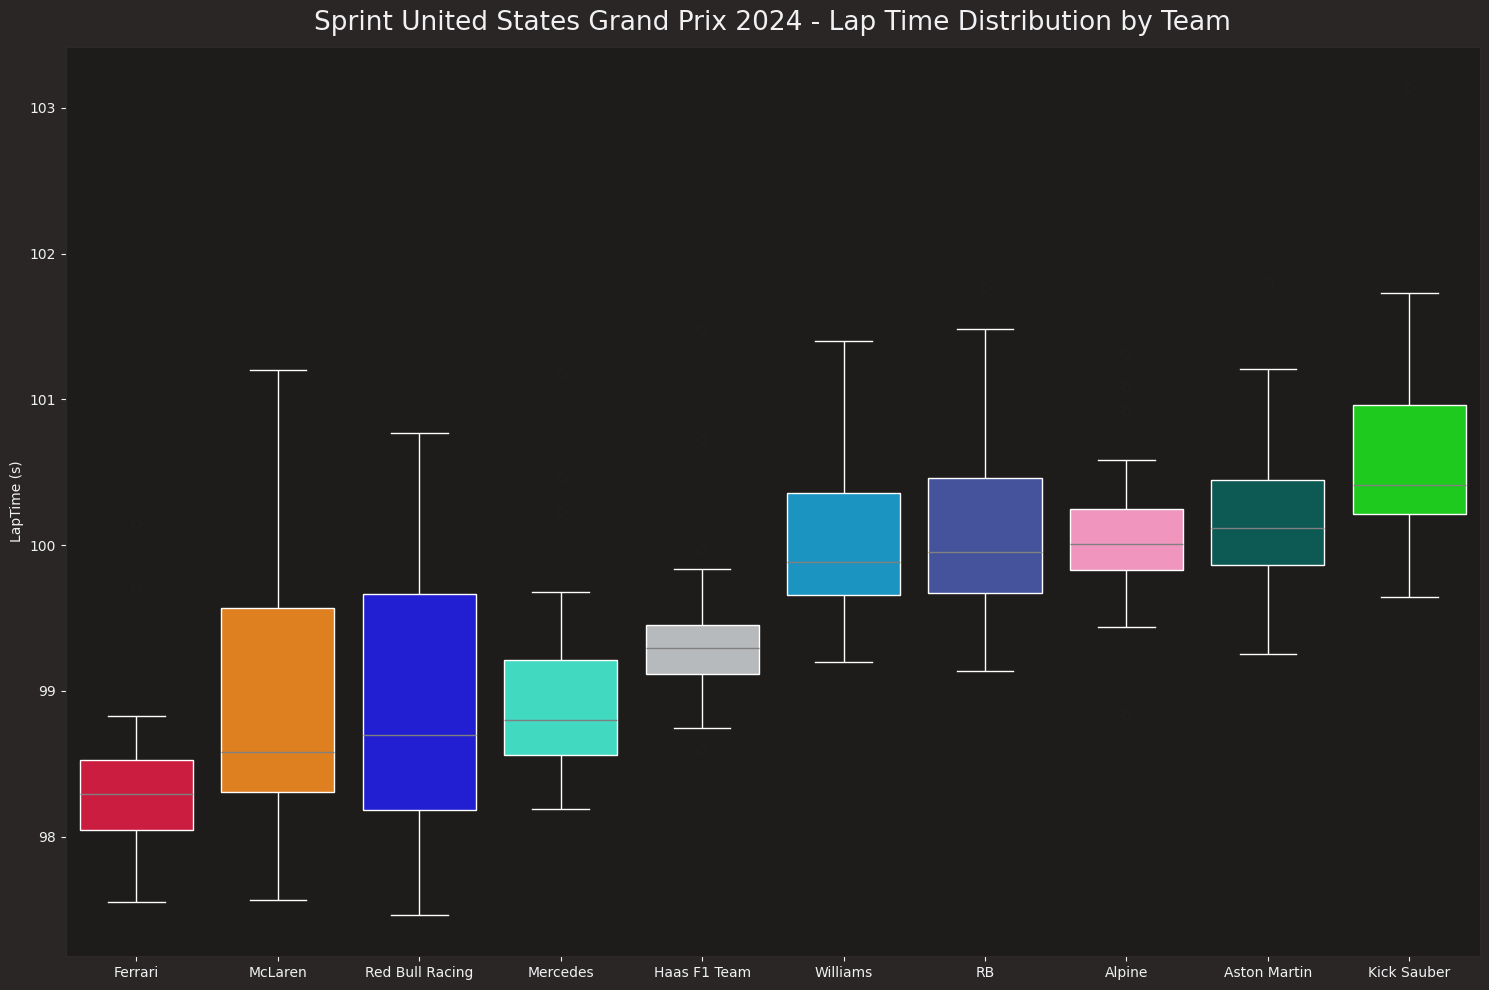

In [9]:
# Boxplots comparativos de ritmo de carrera entre los distintos equipos
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False, color_scheme='fastf1')

fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(
    data=transform_vueltas[["Team", "LapTime (s)"]],
    x="Team",
    y="LapTime (s)",
    hue="Team",
    order=equipos,
    palette=team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title(f"Sprint {sesion.event['EventName']} {sesion.event.year} - Lap Time Distribution by Team")
plt.grid(visible=False)
ax.set(xlabel=None)

# Guardar el gráfico
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/19_USA/graphics/sprint/Lap_time_distribution_teams.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()

## Ritmo de carrera de cada piloto

In [10]:
# Seleccionamos a los pilotos
pilotos = sesion.drivers
pilotos_laps = sesion.laps.pick_drivers(pilotos).pick_quicklaps()
pilotos_laps = pilotos_laps.reset_index()

posicines_finales = [sesion.get_driver(i)["Abbreviation"] for i in pilotos]

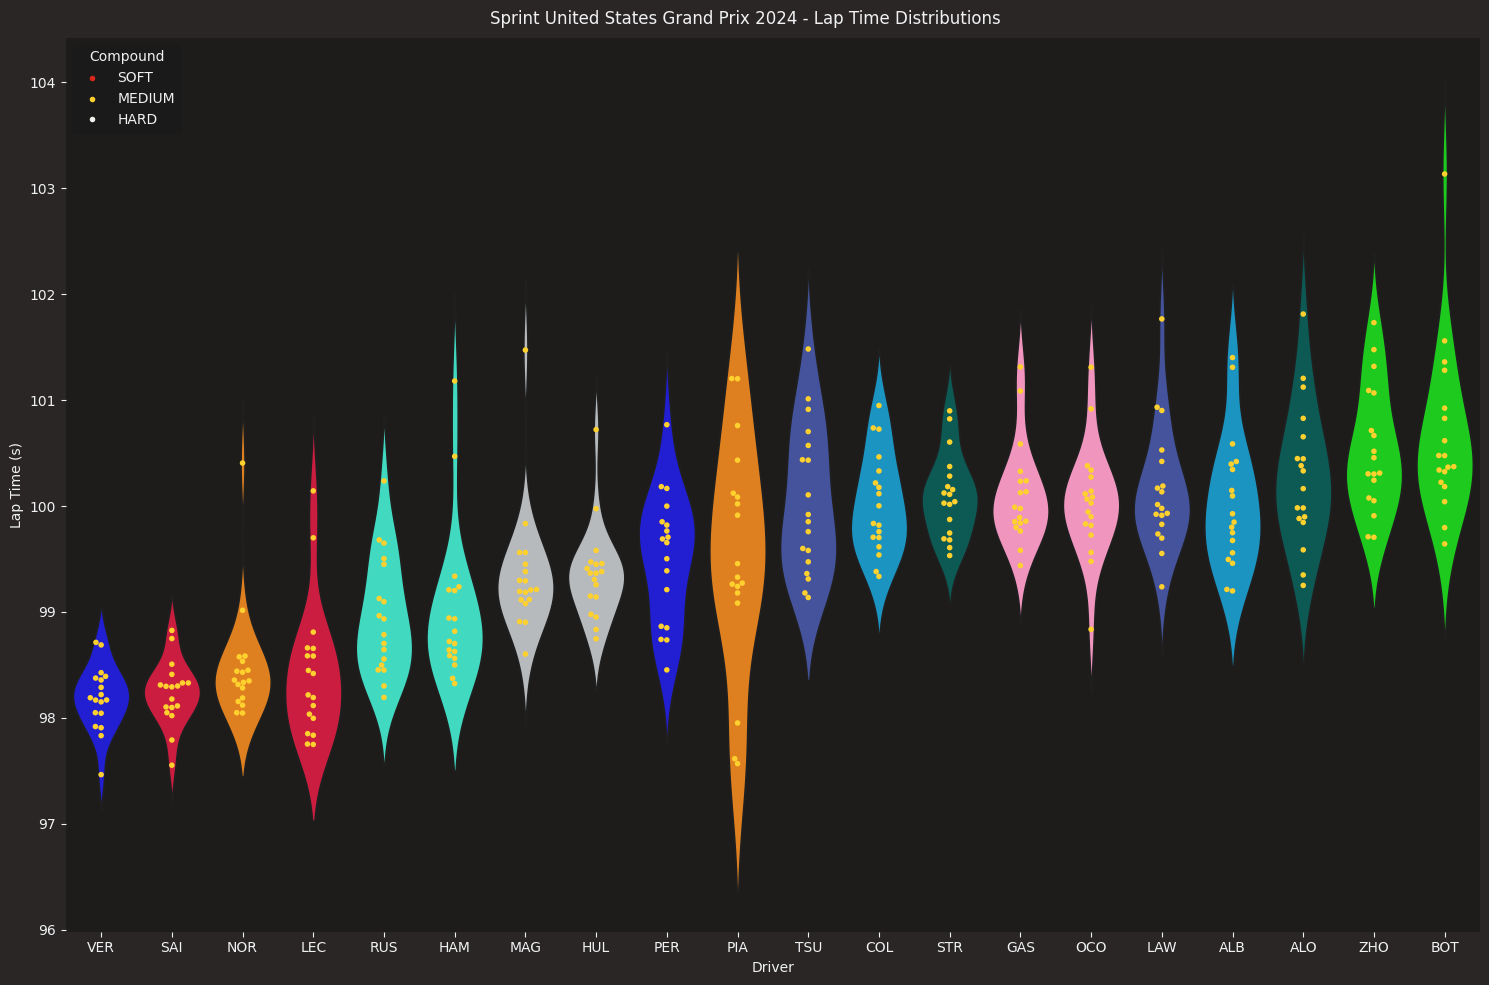

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))

# Convertimos los tiempos de vuelta a segundos
pilotos_laps["LapTime(s)"] = pilotos_laps["LapTime"].dt.total_seconds()

# Grafico de violines y swarmplot
sns.violinplot(data=pilotos_laps,
               x="Driver",
               y="LapTime(s)",
               hue="Driver",
               inner=None,
               density_norm="area",
               order=posicines_finales,
               palette=fastf1.plotting.get_driver_color_mapping(session=sesion)
               )

sns.swarmplot(data=pilotos_laps,
              x="Driver",
              y="LapTime(s)",
              order=posicines_finales,
              hue="Compound",
              palette=fastf1.plotting.get_compound_mapping(session=sesion),
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=4,
              )

# Configuracion del grafico
ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle(f"Sprint {sesion.event['EventName']} {sesion.event.year} - Lap Time Distributions")
sns.despine(left=True, bottom=True)

# Guardar el gráfico
path = 'D:/Users/Laura/Documents/Proyecto Análisis F1/Formula-1/Temporada 2024/19_USA/graphics/sprint/Lap_time_distribution_drivers.png'
plt.savefig(path, dpi=300)
plt.tight_layout()
plt.show()